- Name: Caitlin Lau (**GROUP OF 1**)
- NetID: CJL236
- Discussion: 209 
### Link to Github Repo: (https://github.com/Caitlinjlau/The_final_data_science_proj)

# Research Question: Death Threats on Twitter: Who Receives Them and Why?
- Research question(s). State your research question (s) clearly.
    - This section tracks the overall transformation of my research question. 
    - The research question that I started with before scraping:
        - **"On platforms like twitter Are people of certain demographics (particularly women or POC) more or less likely to receive death threats targeted towards them online?"**
        - What had inspired me pursuing this topic was that on October 2nd, 2020 Twitter announced that tweets wishing the death of Donald Trump after he was diagnosed with COVID 19 were against Twitter's terms of service and needed to be removed. 
        - There was a swift backlash as some women and POC politicians such as New York Democratic Rep. Alexandria Ocasio-Cortez felt that the twitter death threat guidelines had been enforce inconsistently as Twitter had not stood up against their death threats even after repeatedly reporting them to Twitter. 
        - Link to Twitter's TOS death threat article ("https://abcnews.go.com/Business/twitter-accused-double-standard-trump-death-posts/story?id=73450089")
        - This topic is currently on the forefront of the American populace and has really interesting implications of what particular demographics of people are most effected by online hatespeech and harrassment on text-based platforms. 
        - The articles on this topic cite mostly anecdotal evidence for women and POC people saying that they are more heavily affected by threats of violence against them online. 
        - A data-driven analysis and statistical analysis of tweets that I am able to scrape from Twitter's API allows me to not only analyze factors like follower count, verified status, and whether or not an account is a bot, but I can analyze gender based factors in people who were sent death threats.
    - ### WHY IT IS IMPORTANT THAT NEED THIS DATA SET?
        - Since a lot of the articles currently cite SOLELY anecdotal evidence of women receving more death threat, clear statistical evidence and data would either further grant weight to these claims. 
        - This data would be an very interesting op-ed to write about for this class. 



### Research question 2.0 Adding more variables

- After using the Tweepy Twitter API and webscraping tweets off the information to create my own unique data set, I realized that there are more variables that I can calculate statistics for when it comes to people who recieve death threats on twitter. 
- Some of these variables include: 
    - the follower count 
    - number of mutual friends
    - are they a verified twitter account 
    - are they geolocated
- I realized I can also do **multiple research questions** to see if factors like follower counts, number of mutual friends, verified twitter account status, affect the number of death threats that an account recieves. 


# Data Collection and Cleaning 
- Have an <em>initial draft of your data cleaning appendix. </em>
- Document every step that takes your raw data file(s) and turns it into the analysis-ready data set that you would submit with your final project. 

- **Include text cells describing your data collection (downloading, scraping, surveys, etc)**
    - How I collected this data: 
        - I used the Twitter python API called **tweepy** to access the api in order to do web scraping. 
        - I first consulted my TA advisor Andy Zhao on the steps required to properly use the Twitter API. 
        - First I divided up the tweets I want to search into two categories: 
            1. People sharing their experiences **receiving** death threats
            2. People **sending** death threats to other twitter users
        - I first had to register for a twitter API dev account it took 1 day to get my token
        - In python in another Jupyter notebook I coded the following to scrape data from the Twitter API
            1. Get my dev token authorized by Twitter's API
            2. Create my own self defined function which for each phrase parameter I give it: 
                - Call the Tweepy search function for that particular phrase
                - retrieve 400-200 tweets from that phrase 
                - get the user who tweets each of those tweets 
                - store user data in an array (10 parameters)
                - print and store the user data in a csv file
        - In total I search for 6 key phrases: 3 for **receiving** death threats and 3 for **sending** death threats. 
        - Since in my self-defined method it saves each of the csv's per phrase in a new csv, I had 6 csvs.    

- **describing any additional data curation/cleaning (merging data frames, filtering, transformations of variables, etc).**
    - After using the Twitter API, I now have 6 separate CSVs, each with 10 columns which have the same variable titles. 
    - Using Excel, to save time, I copy and pasted the information over from one into one merged data frame. 
        - This file is called **merged_death_threats.csv**
    - Anonmalies: some of the the rows have only an id, but all other user information is blank: I cross referenced the actual accounts on twitter and saw that the tweet was empty and that this was a bot account. These entries in the CSV were deleted manually on excel. 
    - I mostly kept the variable names the same since I created a self-definied method in python and was able to create my own names for the variable. 

### DATA CLEANING CODE
- Include code cells for data curation/cleaning, but not collection. 
- Note: You should be saving data in intermediate files at several points through this process so that you are not starting from scratch every time you change something.
- This also makes sure you have documentation for everything that you have done for your reference, but we do not necessarily need to see all of it in code form.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#open and save the csv into a variable and display head
raw_tweets = pd.read_csv('merged_death_threats.csv')
raw_tweets.head()

,search_word,user,screen_name,text,follow_count,friends,bio,is_verified,is_default_profile,is_default_profile_img,is_geo_enabled
0,I received death threat,User(_api=<tweepy.api.API object at 0x110a2ad9...,COPDLiving,@Paularae06 @washingtonpost I just received a ...,550,692,"Researcher, Business Owner, Author, Amateur G...",False,True,False,True
1,I received death threat,User(_api=<tweepy.api.API object at 0x110a2ad9...,Sik_o_tards,@TrevorSheatz I've never received a death thre...,253,385,"Broken, damaged human. I'm a sinner. The only...",False,True,False,False
2,I received death threat,User(_api=<tweepy.api.API object at 0x110a2ad9...,MistyStream,@DawnButlerBrent Utterly disgusting!!! I‚Äôm s...,48,582,"Mum, NHS employee, Remainer. Passionate about ...",False,True,False,False
3,I received death threat,User(_api=<tweepy.api.API object at 0x110a2ad9...,jordan_j40,y‚Äôall I received my first death threat at wo...,625,919,sc: jordan-j40 ü§òüèΩ,False,True,False,False
4,I received death threat,User(_api=<tweepy.api.API object at 0x110a2ad9...,mediaghosts,This is a death threat. Received at my home in...,2843,477,"Founder, https://t.co/FGnOdL1d7u. Technologist...",False,True,False,False


- **Task 1: Column names** 
    - I am keeping the column names because they are easy to read and are already formatted with underscores and  are properly descriptive of the data in the columns

- **Task 2: drop unnecessary columns**
    - I decided that I need to drop the "user" column because it is json data that is both not useful for this project's analysis of tweet data and is almost uncoprehendable. 


In [3]:
tweets= raw_tweets[['search_word', 'screen_name', 'text', 'follow_count', 'friends', 'bio', 'is_verified', 'is_default_profile', 'is_default_profile_img', 'is_geo_enabled' ]].copy()
tweets.head()


,search_word,screen_name,text,follow_count,friends,bio,is_verified,is_default_profile,is_default_profile_img,is_geo_enabled
0,I received death threat,COPDLiving,@Paularae06 @washingtonpost I just received a ...,550,692,"Researcher, Business Owner, Author, Amateur G...",False,True,False,True
1,I received death threat,Sik_o_tards,@TrevorSheatz I've never received a death thre...,253,385,"Broken, damaged human. I'm a sinner. The only...",False,True,False,False
2,I received death threat,MistyStream,@DawnButlerBrent Utterly disgusting!!! I‚Äôm s...,48,582,"Mum, NHS employee, Remainer. Passionate about ...",False,True,False,False
3,I received death threat,jordan_j40,y‚Äôall I received my first death threat at wo...,625,919,sc: jordan-j40 ü§òüèΩ,False,True,False,False
4,I received death threat,mediaghosts,This is a death threat. Received at my home in...,2843,477,"Founder, https://t.co/FGnOdL1d7u. Technologist...",False,True,False,False


In [4]:
# looking at what type of cleaning we need
#print the column names and print the count of observations per entry type 

for columns in tweets:
    print(columns)
    print(tweets[columns].value_counts())
    print("\n")

search_word
I received death threat    397
please commit suicide      396
sent death threat          393
i hope you die             392
got death threat           197
please go kill yourself    100
Name: search_word, dtype: int64


screen_name
Matt_Cates         9
dojahwasa          6
heIofenty          5
diamondchalamet    4
world_news_eng     4
                  ..
Liz03585743        1
wilbeaux           1
BukiWilliams       1
meowlentine        1
venishere          1
Name: screen_name, Length: 1238, dtype: int64


text
RT @19fenty8: whatever the original problem was with rihanna and this audio byte has completely got lost in the sea of anti-blackness, miso‚Ä¶          288
RT @Chibikko_Chuuya: 28 manga volumes from \n4 different BSD universes\n37 anime episodes\n7 Light Novels \n3 stage plays\n1 Game since\n8 years‚Ä¶     170
RT @bobcesca_go: I received a serious death threat via Twitter DM a few weeks ago. Not a wish -- a threat. I reported it. You guys did noth‚Ä¶          142
RT @

#### What to take away from data cleaning
- Not necessarily all of the text of the tweets are necessarily the person's own tweet about receiving or sending death threats
- The four most frequent text variations are Retweets.
- **Since there are alot of retweet tweets, I need to analyze the data WITH AND WITHOUT the retweets of death threats to see if there is a difference**

# Attributes that idicate if an account is a bot
- "Fame for sale: Efficient detection of fake Twitter followers" Research Paper 
- This research paper really inspired me to see whether or not an account is a bot or not. 
- I learned that using the conclusional chart from this paper, I can use this to create a ranking scale to see if an account is a bot or not using the user attributes that I pulled from the API. 
- Here is the chart: 
- ![Tux, the Linux mascot](new_bot_table.png)
### What I can do with this table/ bot attributes
- I can do another **research question** About are bot accounts more or less likely to send/receive tweets with death messages in them? 

# Data Description 

### What are the observations (rows) and the attributes (columns)? ###
   #### ROWS
    
   - Each observation ( row) is one tweet that was pulled from the Tweepy API using the search function for 1 out of 6 key phrases. 
    - For each of the 6 key phrases, there are approximately 200-400 tweets pulled from the Twitter API.    
    
   #### COLUMNS (attributes)
        
        - Column 0: "search_word"
            - The phrase that I used to tweet API to retrieve tweets that contained that phrase. 
            - There are 6 search_words that I used:
                1. I received death threat
                2. sent death threat
                3. got death threat
                4. please go kill yourself
                5. i hope you die
                6. please commit suicide
            - The first three key words were common phrases VICTIMS of death threats used to share their experiences about recieving death threats.
            - The last three key words were common phrases SENDERS of death threats used to threaten people online with. 
        - **Column 1: "user"**
            - The ID of the User who posted the tweet
        - **Column 2: "screen_name"**
            - The screen username of the user who posted the tweet
        - ** Column 3: "text"**
            - The actual text of the tweet that contains the search_word that I input into the API
        - **Column 4: "follow_count"**
            - The number of followers the account who posted the tweet has
        - **Column 5: "friends"**
            - The number of Mutual followers(friends) the account has
        - **Column 6: "bio"**
            - the self written description or bio that the person has for the account
            - important as the user may self-identify gender information on this variable
        - **Column 7: "is_verified**
            - True/false variable on whether or not the account is verified by Twitter(blue check mark) 
        - **Column 8: "is_default_profile"**
            - True/fasle variable on whether the user has the default profile enabled or not
        - **Column 9: "is_default_profile_img"**
            - True/false variable on whether the person has the default profile picture on their profile.
        - **Column 10: "is_geo_enabled"**
            - True/false variable on whether the person has location tracking on their phone.
        - A link with useful information about the user tweepy object from the API (https://www.geeksforgeeks.org/python-user-object-in-tweepy/)



###  **Why was this dataset created?**
   - This dataset was inspired by on October 2nd, following the diagnosis of President Trump with COVID-19, the official twitter account announced that they would remove and tweets and deathtreats for Trump. 
   - (https://abcnews.go.com/Business/twitter-accused-double-standard-trump-death-posts/story?id=73450089%22)
   - Many women and POC Senators felt that Twitter had inconsistently enforced their suspension guidelines about death threats as they did not feel protected by Twitter. 
   - Senator Alexandria Ocasio-Cortez tweeted as a response to Twitter, "So... you mean to tell us you could‘ve done this the whole time?"
   - A lot of the Op-eds and articles that reported this incident on twitter used **anecdotal** evidence that women felt that they recieved more death threats and were not infrastructurally protected by twitter. 
   - I want to create this database to give strong data-based analysis to twitter's realtion with which demographics recieve the most death threats online so that this anecdotal evidence can either be strengthened or disproven with data statistics. 
   - Hopefully with the importance and urgency that this data set is needed for, I would be really intersted about writing an op-ed about this dataset.

- **Who funded the creation of the dataset?**
    - No one funded the creation of the dataset. I am simply really interested in the topic and created the dataset in order to complete a data science project for a class. 
- **What processes might have influenced what data was observed and recorded and what was not?**
    - Some processess that might have influenced what data was observed was my choice of what particular phrases to search. There was no database of commonly used death threat phrasing on twitter so I selected 6 using trial and error and searching on twitter to see which phrases had the most relavant and enough results for the dataset. 
    - This influences what was not recorded because if I accidentally forgot a really common phrasing for a search word, those tweets would be completely excluded from my data set. 
- **What preprocessing was done, and how did the data come to be in the form that you are using?**
    - The preprocessing that was done is that I tested out several phrases in the search functionality to see if the resulting tweets were even relevant to the topic. The data came to be in the form that I am using because I tried to get a relatively same amount of tweets per key search word that I searched around 200-400 tweets per key words. I then merged all the csv files with the api searches into one singular csv using excel. 
- **If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**
    - The people that were involved include public facing twitter accounts that used one of the 6 phrases that included death threats that I searched using the twitter API. Around 1000 tweets from different accounts were collected and the people who are involved are not aware of the data collection that was done by pulling from the Twitter API. The purpose that they expect the data to be used for is solely statistical calculation and graph visualization. I tried to minimize the amount of identifying information that could be linked back to a sole account in my data analysis. 
- **Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).** 
    ## (https://drive.google.com/file/d/1WuHOtmR--W37j83wkKGcadUmiv2O8kOa/view?usp=sharing)

# Important Overall Note Limitations of the Data Set: How am I going to get Gender Data?
- Following my meeting with the TA Andy and scraping the data from the tweepy API I realized that **there is no variable that shows the gender of the poster's account on twitter** 
- I initially was really stuck on this question since my research question is really hinged on the fact that I need information about this data. 
- TA Andy said I might need to use AI to determine the gender of people based on their name OR profile picture, however this may be outside the scope of the project
- However, **I found a workaround** when reading the entirety of the API 
    - In the bio of many twitter users they include self-disclosed information about their **gender pronouns in the bio.**
    - I retrieved the bio variable for each of the users from the API and in the data cleaning phase **scraped the bios of the users to determine self-disclosed gender pronouns to determine the gender of the account** 
    - This was a doable and easy work around the fact that the Twitter API dosen't have gender information. 
    - Although more entries may be Culled, since not every account provides self-disclosed pronouns in their bio, it still give us a sizeable amount of people who we can analyze the patterns of death threats and gender from. 

# Data Limitations 
- Identify any potential problems with your dataset.
    - Potential privacy problems
        1. I am scraping gender information from people's self-declared pronouns on their biographies. 
        2. As a queer nonbinary person (she/they) pronouns, I feel kind of distressed about doing so as I am scared I might put queer or trans people in danger
        3. What I am doing to try and fix this problem 
            4. I am not graphing or analyzing username/id information. Simply just pronouns in biographies. 
            5. I want to minimize the risk of people going back and reidentifying the data. 
    - Potential demographic problems
        - It may be standard in more liberal leaning networks and people with higher levels of education (i.e. academia) to put their pronouns in their bio. 
        - I could potentially be leaving out a lot of people who simply don't care about pronouns, don't know about pronouns, or simply don't have pronouns in their bio.
        - Although this limit is a risk with my data set, it is important to note that **gender is only one of the attributes that I am calculating statistics for**. 
        - My data analysis includes 9 more variables, which all the tweets I recieved information for have information for
        - **There are a diverse array of demographic information that I have gotten from twitter's API**

# Exploratory data analysis 
- Perform an (initial) exploratory data analysis. 
- Compute some relevant summary statistics, and show some plots of your data, as applicable to your research question(s). 
- mean and standard deviation along with visual displays like scatter plots and histograms to describe data

- summary statistics: mean, median, mode, standard deviation, variance, quantiles
- plots: histograms, boxplots, scatterplots

In [5]:
from matplotlib import pyplot as plt

In [6]:
tweets.head()

,search_word,screen_name,text,follow_count,friends,bio,is_verified,is_default_profile,is_default_profile_img,is_geo_enabled
0,I received death threat,COPDLiving,@Paularae06 @washingtonpost I just received a ...,550,692,"Researcher, Business Owner, Author, Amateur G...",False,True,False,True
1,I received death threat,Sik_o_tards,@TrevorSheatz I've never received a death thre...,253,385,"Broken, damaged human. I'm a sinner. The only...",False,True,False,False
2,I received death threat,MistyStream,@DawnButlerBrent Utterly disgusting!!! I‚Äôm s...,48,582,"Mum, NHS employee, Remainer. Passionate about ...",False,True,False,False
3,I received death threat,jordan_j40,y‚Äôall I received my first death threat at wo...,625,919,sc: jordan-j40 ü§òüèΩ,False,True,False,False
4,I received death threat,mediaghosts,This is a death threat. Received at my home in...,2843,477,"Founder, https://t.co/FGnOdL1d7u. Technologist...",False,True,False,False


In [7]:
#summing important numbers 
tweets_length= len(tweets)
RT_arr= tweets.loc[tweets['text'].str.contains("RT")]
RT_arr.head()
num_RT=len(RT_arr)
print("There are {} total tweets in the dataframe".format(tweets_length))
print("The number of text tweets that are Retweets are {}".format(num_RT))



There are 1875 total tweets in the dataframe
The number of text tweets that are Retweets are 1261


In [8]:

#mean 
print("The mean of the follow count is {:.2f}".format(tweets["follow_count"].mean()))
print("The mean of the friends is {:.2f}".format(tweets["friends"].mean()))

print("\nThe median of the follow count is {:.2f}".format(tweets["follow_count"].median()))
print("The median of friends is {:.2f}".format(tweets["friends"].median()))

print("\nThe standard deviation of the follow count is {:.2f}".format(tweets["follow_count"].std()))
print("The standard deviation of friends is {:.2f}".format(tweets["friends"].std()))

print("\nThe variance of the follow count is {:.2f}".format(tweets["follow_count"].var()))
print("The variance of friends is {:.2f}".format(tweets["friends"].var()))

The mean of the follow count is 2880.57
The mean of the friends is 1395.41

The median of the follow count is 407.00
The median of friends is 518.00

The standard deviation of the follow count is 19474.73
The standard deviation of friends is 4524.92

The variance of the follow count is 379265259.00
The variance of friends is 20474889.61


### Analyzing the follower/friend realtionship to see if these accounts are real/bots

In [9]:
#quantiles
#the 1rst quartile is
follower_series=pd.Series(tweets["follow_count"])
first_follower_quartile=follower_series.quantile(.25)
print("The first quartile of the follower counts is: {:.2f}".format(first_follower_quartile))

The first quartile of the follower counts is: 118.50


the mean follower count for each of the search words is:
                         follow_count
search_word                          
I received death threat       3941.51
got death threat              1071.09
i hope you die                4013.79
please commit suicide         1178.97
please go kill yourself        948.98
sent death threat             3791.60


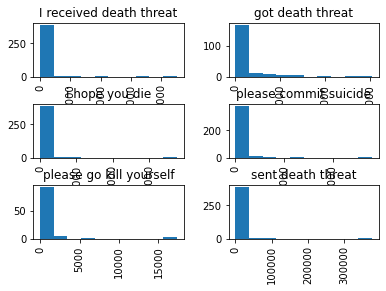

In [10]:
print("the mean follower count for each of the search words is:")
search_word_mean_arr = round(tweets[["search_word", "follow_count"]].groupby("search_word").mean(),2)
print(search_word_mean_arr)

search_word_follow_count_hist=tweets["follow_count"].hist(by=tweets["search_word"])
#"I received death threat", "got death threat", "i hope you die", "please commit suicide", "please go kill yourself", "sent death threat"

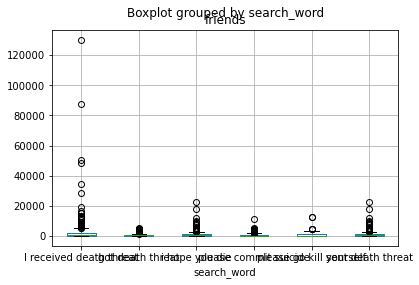

In [11]:
friend_boxplot=tweets.boxplot(column='friends', by="search_word", grid=True)

In [12]:
maxfollowcount = tweets["follow_count"].max()
print(maxfollowcount)

376462


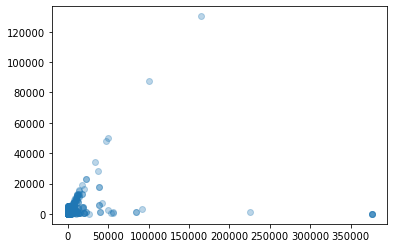

In [13]:
plt.scatter(tweets["follow_count"], tweets["friends"], alpha=0.3)

## Analyzing statistics about people with She/her/hers pronouns in bio

In [14]:
# DF with people with she/her/hers/herself pronouns in their bio
she_her_hers_bio_arr= tweets.loc[ (tweets['bio'].str.contains("mother")) | (tweets['bio'].str.contains("mom")) | (tweets['bio'].str.contains("woman")) | (tweets['bio'].str.contains("herself")) | (tweets['bio'].str.startswith(" she")) | (tweets['bio'].str.contains("she/")) | (tweets['bio'].str.contains("/her")) | (tweets['bio'].str.contains("/hers"))]

num_she_her_hers = len(she_her_hers_bio_arr)
print("The number of tweets tweeted by people with she/her/hers pronouns is {}".format(num_she_her_hers))
print ("The Porportion of people with she/her/hers pronouns in their bio out of all the tweets in the dataset is: {:.2f}".format(num_she_her_hers/tweets_length))
print("An example bio of someone with she/her/hers pronouns in their bio is:")

she_her_hers_bio_arr.head(n=5)

The number of tweets tweeted by people with she/her/hers pronouns is 165
The Porportion of people with she/her/hers pronouns in their bio out of all the tweets in the dataset is: 0.09
An example bio of someone with she/her/hers pronouns in their bio is:


,search_word,screen_name,text,follow_count,friends,bio,is_verified,is_default_profile,is_default_profile_img,is_geo_enabled
24,I received death threat,LeesaRaaum,RT @kelly_neidert: I just received another dea...,14171,13195,Married to a die hard KC Royals & KC Chiefs fa...,False,True,False,True
39,I received death threat,otbalwaysyou,honestly surprised i haven't received an anon ...,818,452,"you sunshine, you temptress || she/her",False,True,False,False
55,I received death threat,Theresa90842128,RT @kelly_neidert: I just received another dea...,8387,9233,"Common sense, Christian, Patriot, Mother 3 chi...",False,True,True,False
107,I received death threat,sol__noctis,saw a tweet about it and now I‚Äôm curious..\n...,220,131,breaking hearts and adopting cats since ‚Äò98 ...,False,False,False,True
110,I received death threat,vjf6122,RT @Drunemeton: @mmpadellan It does NOT extend...,1089,1540,mother grandmother and fighting for the right ...,False,True,False,True


In [15]:
num_she_dt_received_arr= she_her_hers_bio_arr.loc[(she_her_hers_bio_arr['search_word']=="I received death threat") | (she_her_hers_bio_arr['search_word']== "sent death threat") | (she_her_hers_bio_arr['search_word']=="got death threat")]
num_she_dt_received = len(num_she_dt_received_arr)
print("The number of women with she/her/hers pronouns in their bio that RECIEVED death threats is: {}".format(num_she_dt_received))

num_she_dt_sent_arr= she_her_hers_bio_arr.loc[(she_her_hers_bio_arr['search_word']=="please go kill yourself") | (she_her_hers_bio_arr['search_word']== "i hope you die") | (she_her_hers_bio_arr['search_word']=="please commit suicide")]
num_she_dt_sent = len(num_she_dt_sent_arr)
print("\nThe number of women with she/her/hers pronouns in their bio that SENT death threats is: {}".format(num_she_dt_sent))


The number of women with she/her/hers pronouns in their bio that RECIEVED death threats is: 83

The number of women with she/her/hers pronouns in their bio that SENT death threats is: 82


## Analyzing statistics about people with he/him/his pronouns in bio

In [16]:
# DF with people with she/her/hers/herself pronouns in their bio
he_him_his_bio_arr= tweets.loc[(tweets['bio'].str.contains("guy")) | (tweets['bio'].str.contains("dad")) | (tweets['bio'].str.contains("father")) |(tweets['bio'].str.contains("himself")) | (tweets['bio'].str.contains("his")) | (tweets['bio'].str.contains(" he/")) | (tweets['bio'].str.contains("/his")) | (tweets['bio'].str.contains("/him"))]

num_he_him_his = len(he_him_his_bio_arr)
print("The number of tweets tweeted by people with he/him/his pronouns is {}".format(num_he_him_his))
print ("The Porportion of people with he/him/his pronouns in their bio out of all the tweets in the dataset is: {:.2f}".format(num_he_him_his/tweets_length))
print("An example bio of someone with he/him/his pronouns in their bio is:")

he_him_his_bio_arr.head(n=5)

The number of tweets tweeted by people with he/him/his pronouns is 130
The Porportion of people with he/him/his pronouns in their bio out of all the tweets in the dataset is: 0.07
An example bio of someone with he/him/his pronouns in their bio is:


,search_word,screen_name,text,follow_count,friends,bio,is_verified,is_default_profile,is_default_profile_img,is_geo_enabled
6,I received death threat,ProletariatDave,I've just received my first death threat from ...,99,363,Far leftist. Social service worker. Social wor...,False,True,False,False
7,I received death threat,wokozi,"#ÌõÑÎãàÎ≤ÑÌÑ∞ ‚ãÜ Last monday i, Detective Lee...",401,433,"#ÌõÑÎãàÎ≤ÑÌÑ∞ : He sings, dances, produces, an...",False,True,False,False
27,I received death threat,PatriotMember,RT @kelly_neidert: I just received another dea...,3721,5000,"#MAGA #Patriot, learn from our history, can‚Äô...",False,True,False,False
33,I received death threat,kendokenu,RT @kelly_neidert: I just received another dea...,6947,6922,"""Mama always says, ""If you can't say anything ...",False,False,False,False
43,I received death threat,MnMJax98,"If you think that's a death threat, I shudder ...",878,1452,"Autistic native author doing his best. Bi, tra...",False,False,False,True


In [17]:
num_he_dt_received_arr= he_him_his_bio_arr.loc[(he_him_his_bio_arr['search_word']=="I received death threat") | (he_him_his_bio_arr['search_word']== "sent death threat") | (he_him_his_bio_arr['search_word']=="got death threat")]
num_he_dt_received = len(num_he_dt_received_arr)
print("The number of men with he/him/his pronouns in their bio that RECIEVED death threats is: {}".format(num_he_dt_received))

num_he_dt_sent_arr= he_him_his_bio_arr.loc[(he_him_his_bio_arr['search_word']=="please go kill yourself") | (he_him_his_bio_arr['search_word']== "i hope you die") | (he_him_his_bio_arr['search_word']=="please commit suicide")]
num_he_dt_sent = len(num_he_dt_sent_arr)
print("\nThe number of men with he/him/his pronouns in their bio that SENT death threats is: {}".format(num_he_dt_sent))


The number of men with he/him/his pronouns in their bio that RECIEVED death threats is: 67

The number of men with he/him/his pronouns in their bio that SENT death threats is: 63


# Questions for reviewers

- Going forward, How am I going to scrape more gender data for my data set approximately I was able to get the pronouns of 300 people total out of my dataset of 1800 people. Should I continue to scape more data and add it to my dataset to get more people with pronouns in their bio. 
- Is my data set big enough? I have around 1800 entries but aroun 1200 are retweets in some form.
    - There is no way to filter out retweets in the Tweepy API so I need to do it in post when analyzing the data
- Could I go further with the analysis of my gender variable? Or should I move onto other factors like follow_count, friends, are they a bot? 
- Sometimes the pronoun sorting statement that I personally wrote in code is not 100% accurate. It's mostly accurate but sometimes, it sorts people into wrong categories. Is this fine?

# Code Refernce Appendix

### Attached in this zip file is a python file "tweepy_hello_world.py"

- **Code references that taught me how to write my own self-defined functions** **I wrote my own functions for accessing the API but these links provided me API reference on how to do so since this was the first time using an API for scraping**
- How to use and add onto Numpy Array 
(https://stackoverflow.com/questions/9775297/append-a-numpy-array-to-a-numpy-array)
- How to make your own python function 
(https://www.w3schools.com/python/python_functions.asp)
- 

- ** HOW TO USE THE TWEEPY API**
- I was inspired by these chunks of code, however, I mostly read the API and used the documentation from there. 
- Theses Links are a good place to get started though if you have never used the Twitter API before.
    - (http://docs.tweepy.org/en/latest/getting_started.html) 
    - (http://docs.tweepy.org/en/latest/api.html#user-methods)
    - (https://python.gotrained.com/twitter-api-search-tweets/)
    - ** NON TWEEPY API RESOURCES
    - (http://docs.tweepy.org/en/latest/cursor_tutorial.html)
    - (https://stackoverflow.com/questions/56862572/how-to-extract-tweets-location-which-contain-specific-keyword-using-twitter-api)
    - (https://www.geeksforgeeks.org/python-tweepy-getting-the-screen-name-of-a-user/)

## Research Papers and Literature Review that inspired my data set
- Before starting to program, I looked to see if there were pre-existing datasets for death threats on Twitter. 
- I **Could NOT** find any that were the exact data set that I needed for this project. 
- However, I was able to find descriptions in related research papers that inspired my data set. 
- Links to Research Papers Below:
    - Detecting threats of violence in online discussions (https://www.semanticscholar.org/paper/Detecting-threats-of-violence-in-online-discussions-Wester/669da1a41201c3567854c2894a63d6f31f5e1d08#extracted)
    - Number of convictions for death threats against spouses or cohabitants in France from 2014 to 2018, by gender of author (https://www.statista.com/statistics/783303/sentences-for-death-threats-couple-gender-author-france/)
    - Threat Detection in Tweets with Trigger Patterns and Contextual Cues (https://www.researchgate.net/publication/267479922_Threat_Detection_in_Tweets_with_Trigger_Patterns_and_Contextual_Cues) 
    - 
